# Imports

In [27]:
import numpy as np
from disc import *
import coefficient_model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulation setup

In [169]:
d = Disc(
    0, # initial x position (m)
    0, # initial y position (m)
    1.2, # initial z position (m)
    13.42, # initial speed along x-axis (m/s)
    -0.41, # initial speed along y-axis (m/s)
    0.001, # initial speed along z-axis (m/s)
    -0.07, # initial euler angle: -hyzer/+anhyzer/0-flat release (rad)
    -0.21, # initial euler angle: nose angle -nose up/+nose down (rad)
    5.03, # initial euler angle:  (rad)
    -14.94, # phi time derivative (rad / s)
    -1.48, # theta time derivative (rad / s)
    54.24, # gamma time derivative
    False
)

d.coefficients = coefficient_model.Model(
    0.23, #PL0: lift parameter at 0 angle of attack (alpha)
    5.9, #PLa: linear lift parameter that multiplies angle of attack  GLIDE?
    0.03, #PD0: drag parameter at alpha_0
    0.69, #PDa: quadratic drag parameter, multiplies square angle of attack
    -0.013, #PTxwx: x-axis torque parameter linear in x-axis angular velocity
    -0.0017, #PTxwz: x-axis torque parameter linear in z-axis angular velocity
    -0.002, #PTy0: y-axis torque parameter (pitch) at alpha = 0
    0.0, #PTya: y-axis torque parameter linear in alpha
    -0.014, #PTywy: y-axis torque parameter linear in y-axis angular velocity
    -0.000034 #PTzwz: z-axis torque parameter linear in z-axis angular velocity
)
d.has_model = True

times, trajectory = d.get_trajectory(
    0, #initial flight time (s)
    15, #final flight time (s)
    0.01, #time step (s)
    False # If False, only return an array with x,y,z, otherwise return all kinematic variables
)

x,y,z = trajectory.T

# 3d plot of disc flight trajectory

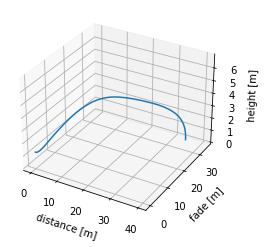

In [170]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel('height [m]')
ax.set_xlabel('distance [m]')
ax.set_ylabel('fade [m]')
ax.plot(x, y, z, label='graph')
plt.show()

# Disc trajectory projected on the ground

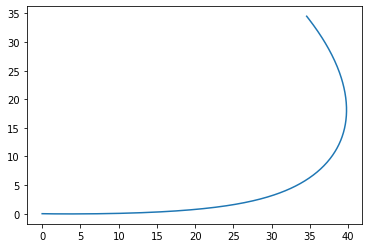

In [171]:
plt.plot(x, y)
plt.show()

# Disc flight height chart

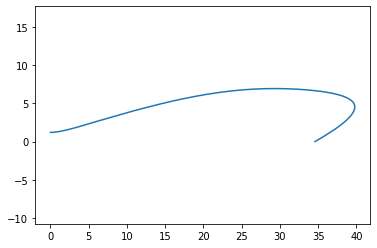

In [172]:
plt.plot(x, z)
plt.axis("equal")
plt.show()